# Projection Onto A Simplex
* This notebook demonstrates the validity and the performance of the algorithm presented in (Chen and Ye, "Projection Onto A Simplex", 2011).
* Author: Sangwoong Yoon (sangwoong24yoon@gmail.com)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import time
import sys
sys.path.append('../')
from src.projsplx import projsplx
plt.style.use('ggplot')

## 2D Projection Example

In [9]:
l_y = []
l_p = []
for _ in xrange(50):
    yy = np.random.randn(2)
    pp = projsplx(yy)
    l_y.append(yy)
    l_p.append(pp)
Y = np.vstack(l_y)
P = np.vstack(l_p)

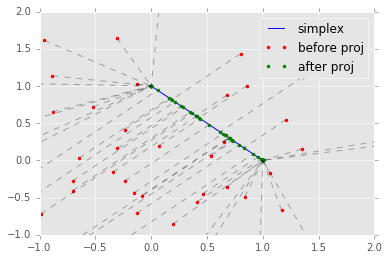

In [28]:
plt.plot([0,1],[1,0], 'b', label='simplex')
plt.xlim([-1,2])
plt.ylim([-1,2])
plt.plot(Y[:,0], Y[:,1], '.r', label='before proj')
plt.plot(P[:,0], P[:,1], '.g', label='after proj')
for i in xrange(Y.shape[0]):
    plt.plot([Y[i,0], P[i,0]], [Y[i,1], P[i,1]], 'k--', alpha=0.3)
plt.legend(loc='best')


## Speed Test
* The projection algorithm scales almost linearly with the dimension

In [24]:
l_D = np.arange(2,1000,20)
nRepeat = 10000
l_t_vs_D = []

for d in l_D:
    l_repeat_time = []
    l_vector = [np.random.randn(d) for _ in xrange(nRepeat)]
    for i in xrange(nRepeat):
        time_s = time.time()
        projsplx(l_vector[i])
        t = time.time() - time_s
        l_repeat_time.append(t)
        
    t_avg = np.array(l_repeat_time).mean()
    l_t_vs_D.append(t_avg)

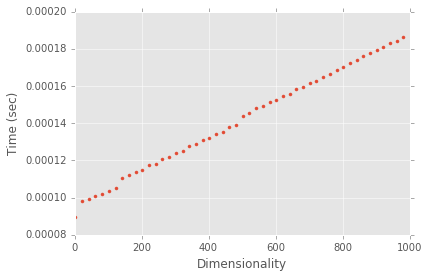

In [25]:
plt.plot(l_D, l_t_vs_D, '.')
plt.xlabel('Dimensionality')
plt.ylabel('Time (sec)')